In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
from src import sp_visualizacion as vis
from src import sp_analisis as an

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x : '%.4f' % x)

In [2]:
# Leemos el archivo de datos limpio manteniendo el formato de fecha en las columnas date y dt_customer
df = pd.read_csv("../data/data-clean.csv", parse_dates=['date', 'dt_customer'])
df.head()

,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,date,id,dt_customer,numwebvisitsmonth,contact_year,contact_month,customer_year,customer_month,subscribed,duration_min,have_children,income_type,age_knn,euribor3m_knn
0,housemaid,married,basic.4y,no,no,no,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,5191,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079,2012-04-04,29,2019.0000,8.0000,2012,4,no,4.3500,yes,superior,38.2000,4.8570
1,services,married,high.school,unkown,no,no,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,5191,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097,2012-12-30,7,2016.0000,9.0000,2012,12,no,2.4800,yes,high,57.0000,4.9434
2,services,married,high.school,no,yes,no,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,5191,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b,2012-02-02,5,2019.0000,2.0000,2012,2,no,3.7700,yes,superior,37.0000,4.8570
3,admin.,married,basic.6y,no,no,no,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,5191,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e,2012-12-21,29,2015.0000,11.0000,2012,12,no,2.5200,yes,high,40.0000,4.2088
4,services,married,high.school,no,no,yes,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,5191,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2012-06-20,20,2017.0000,1.0000,2012,6,no,5.1200,yes,low,56.0000,4.9214


## Tasa de conversión

In [3]:
conversion_rate = ((df['subscribed'].value_counts()['yes']) / (df.shape[0]))* 100
round(conversion_rate, 2)

np.float64(11.27)

## Tasa de resolución en el primer contacto (FCR)

In [4]:
df['FCR'] = ((df['subscribed'] == 'yes') & (df['campaign'] == 1)).astype(int)
first_conversion_rate = ((df['FCR'].value_counts()[1]) / (df.shape[0]))* 100
first_conversion_rate
round(first_conversion_rate, 2)

np.float64(5.57)

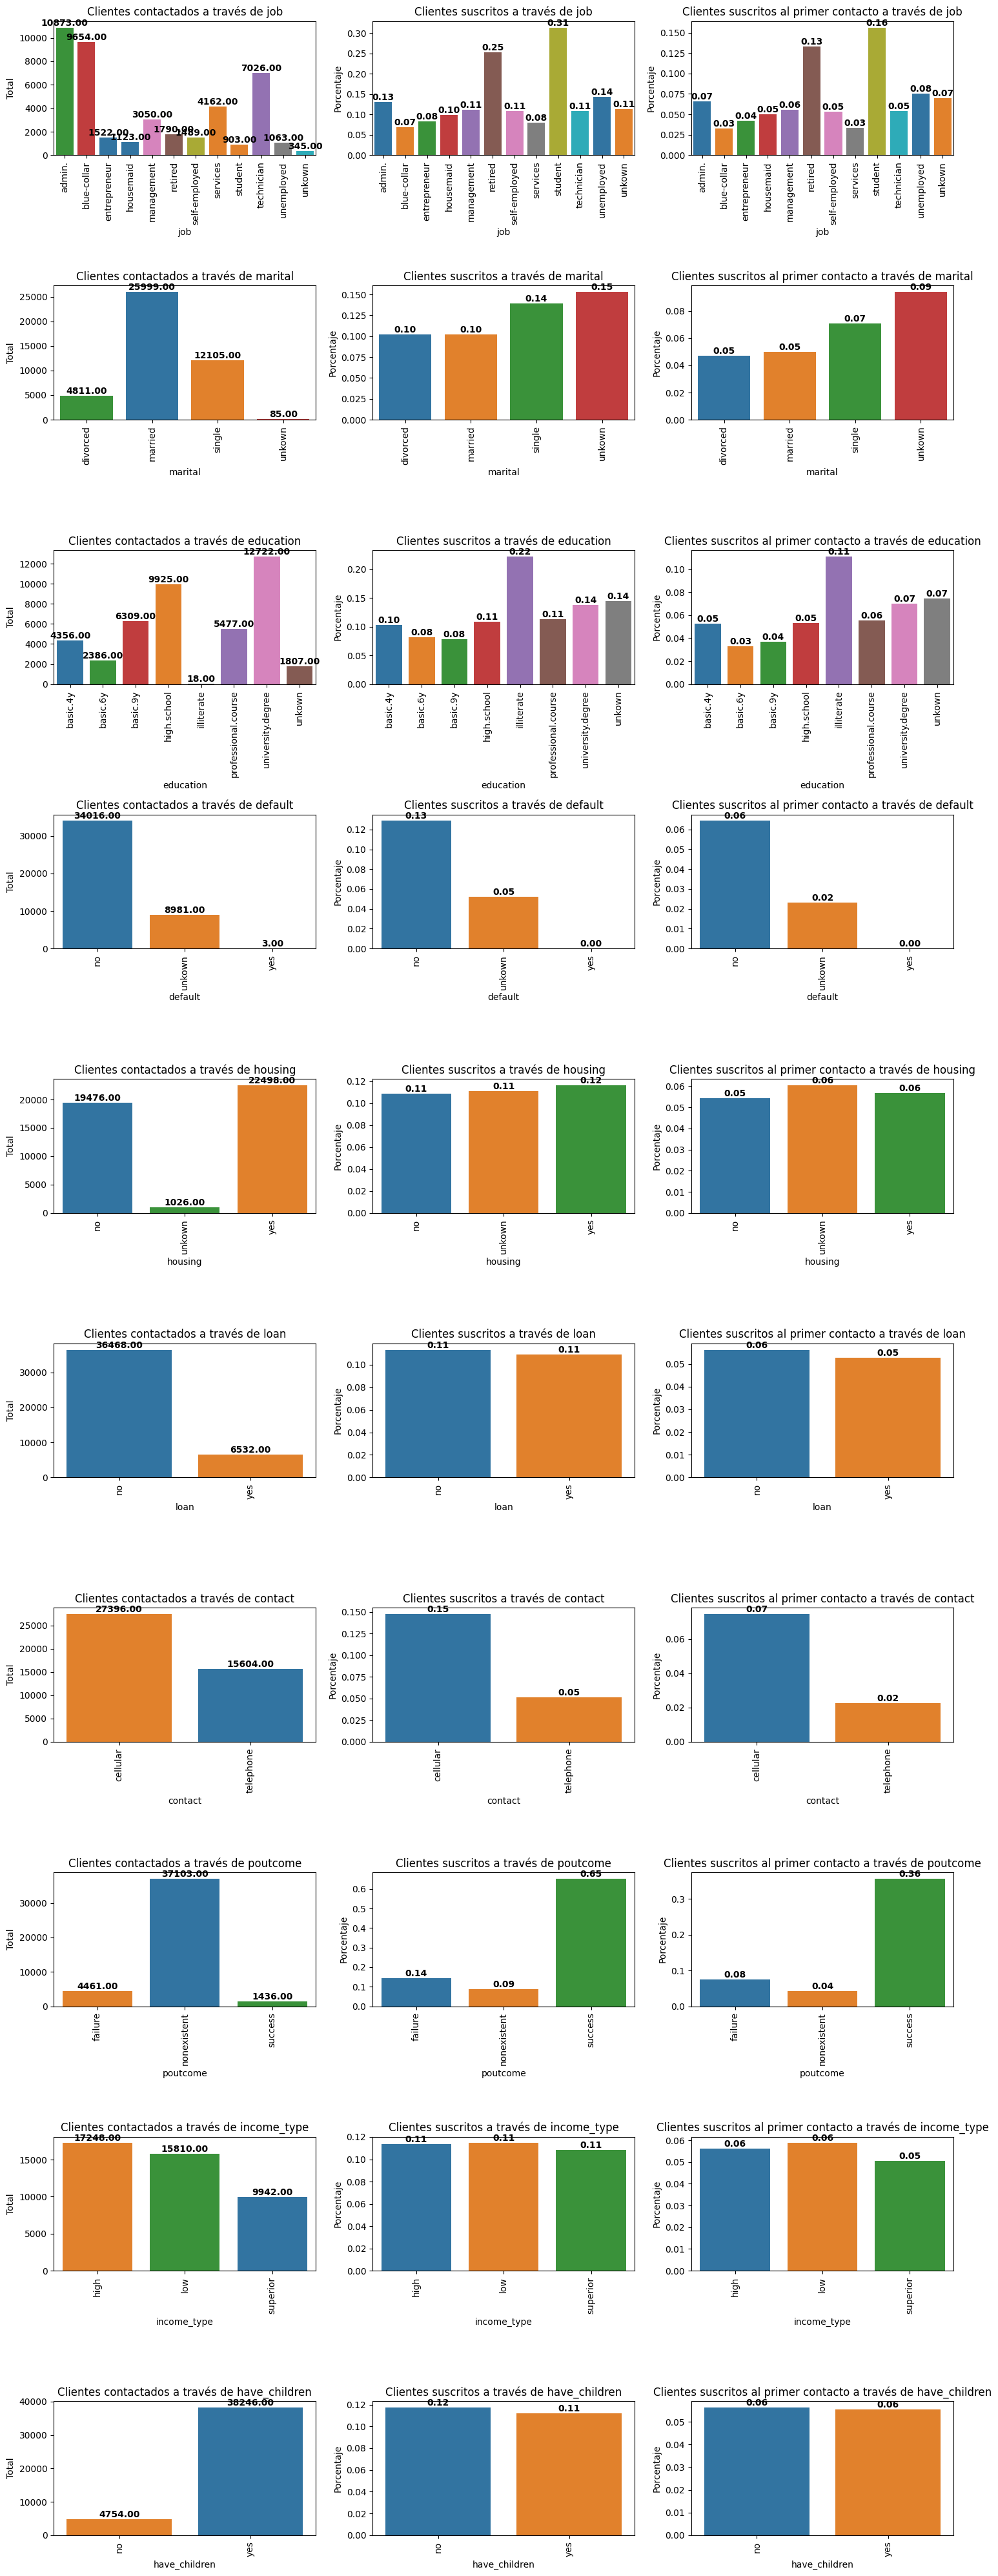

In [5]:
columnas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'income_type', 'have_children']
vis.barplot_compareCat(df, 'subscribed', 'FCR', columnas)

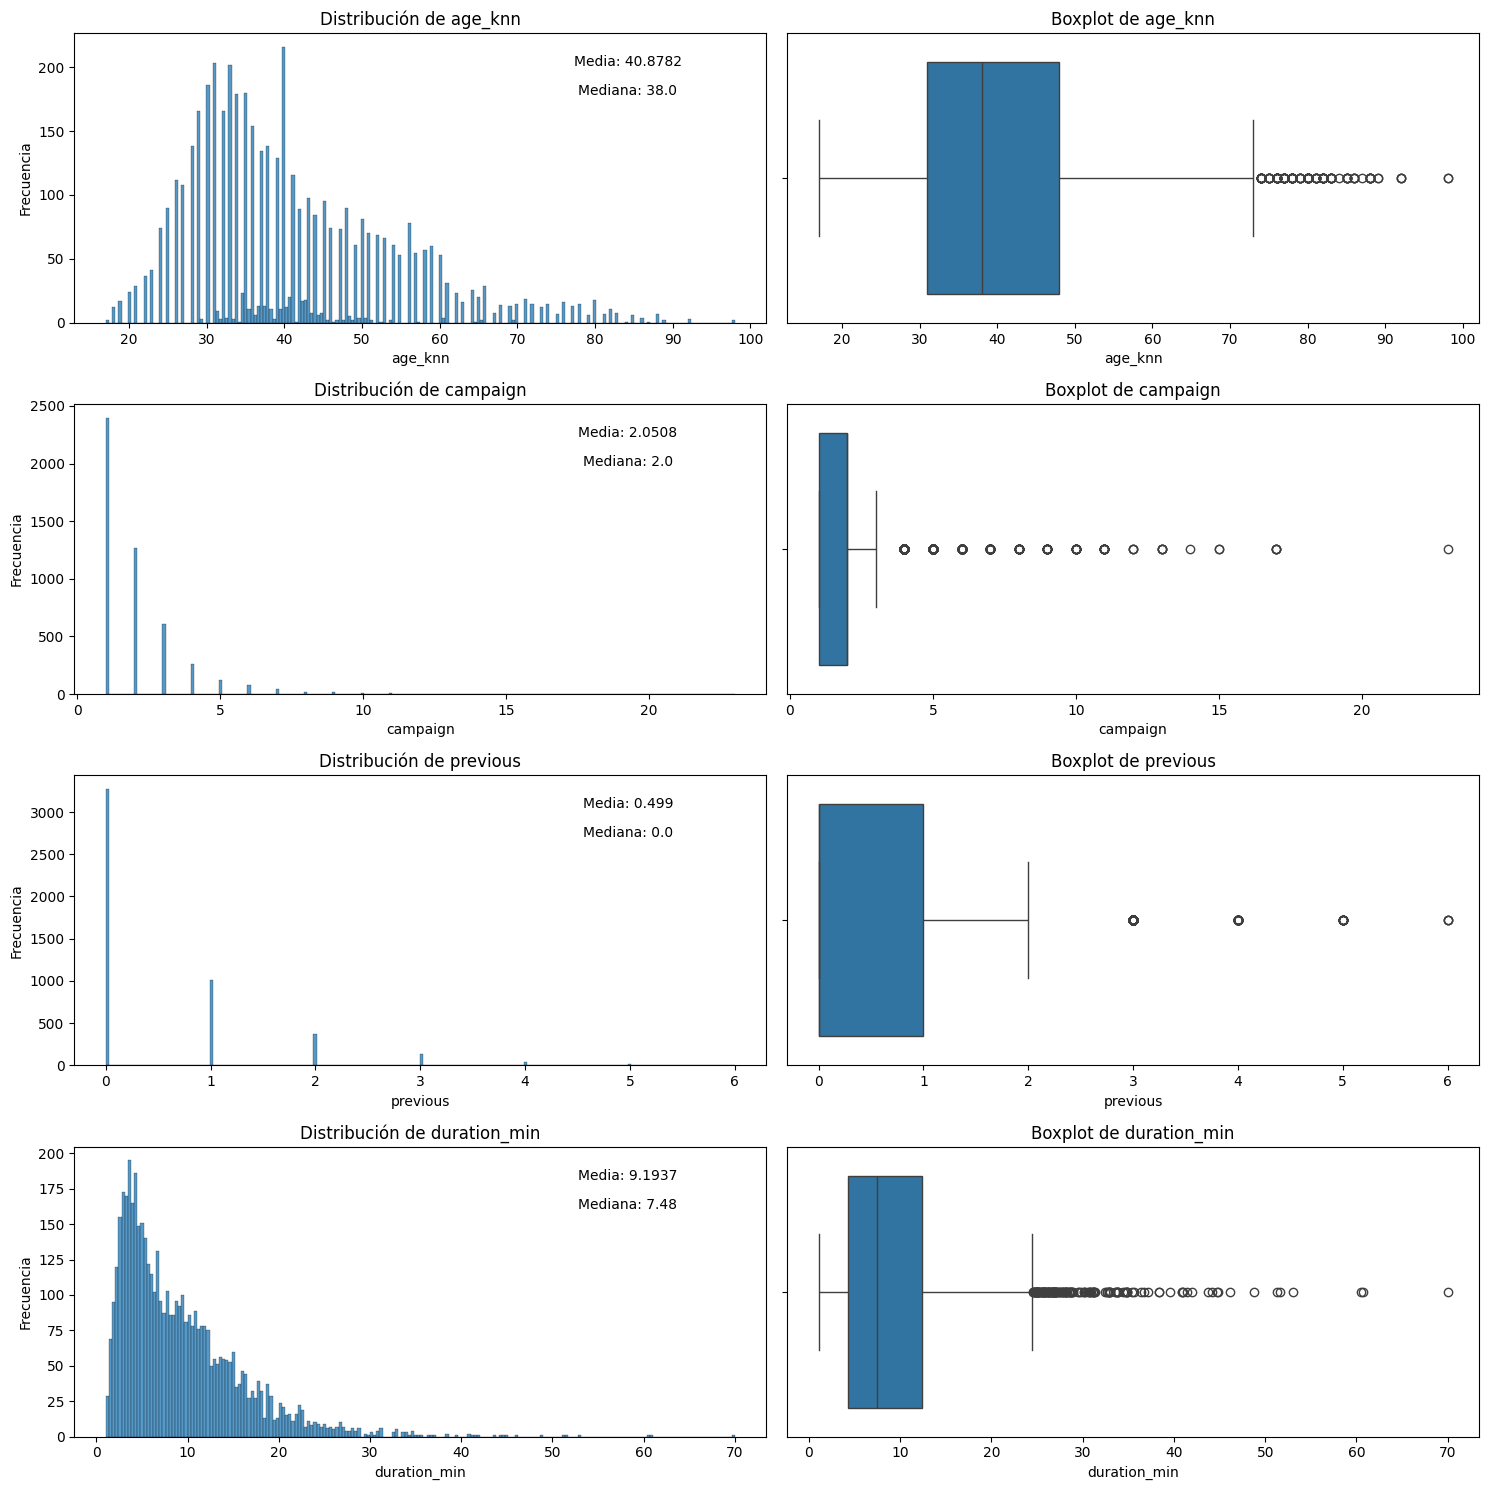

In [6]:
df_yes = df[df['subscribed'] == 'yes']
col_num = ['age_knn', 'campaign', 'previous', 'duration_min']
vis.subplot_col_num(df_yes, col_num)

In [7]:
df_yes = df[df['subscribed'] == 'yes']
df_yes.sample()

,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,date,id,dt_customer,numwebvisitsmonth,contact_year,contact_month,customer_year,customer_month,subscribed,duration_min,have_children,income_type,age_knn,euribor3m_knn,FCR
30447,technician,married,professional.course,no,yes,yes,cellular,2,-1,0,nonexistent,-1.8000,92.8930,-46,5099,2016-09-20,ef84f4a3-1f75-405c-a6f9-6a5e63720d90,2014-03-27,12,2016.0000,9.0000,2014,3,yes,5.5500,yes,high,56.0000,1.3540,0


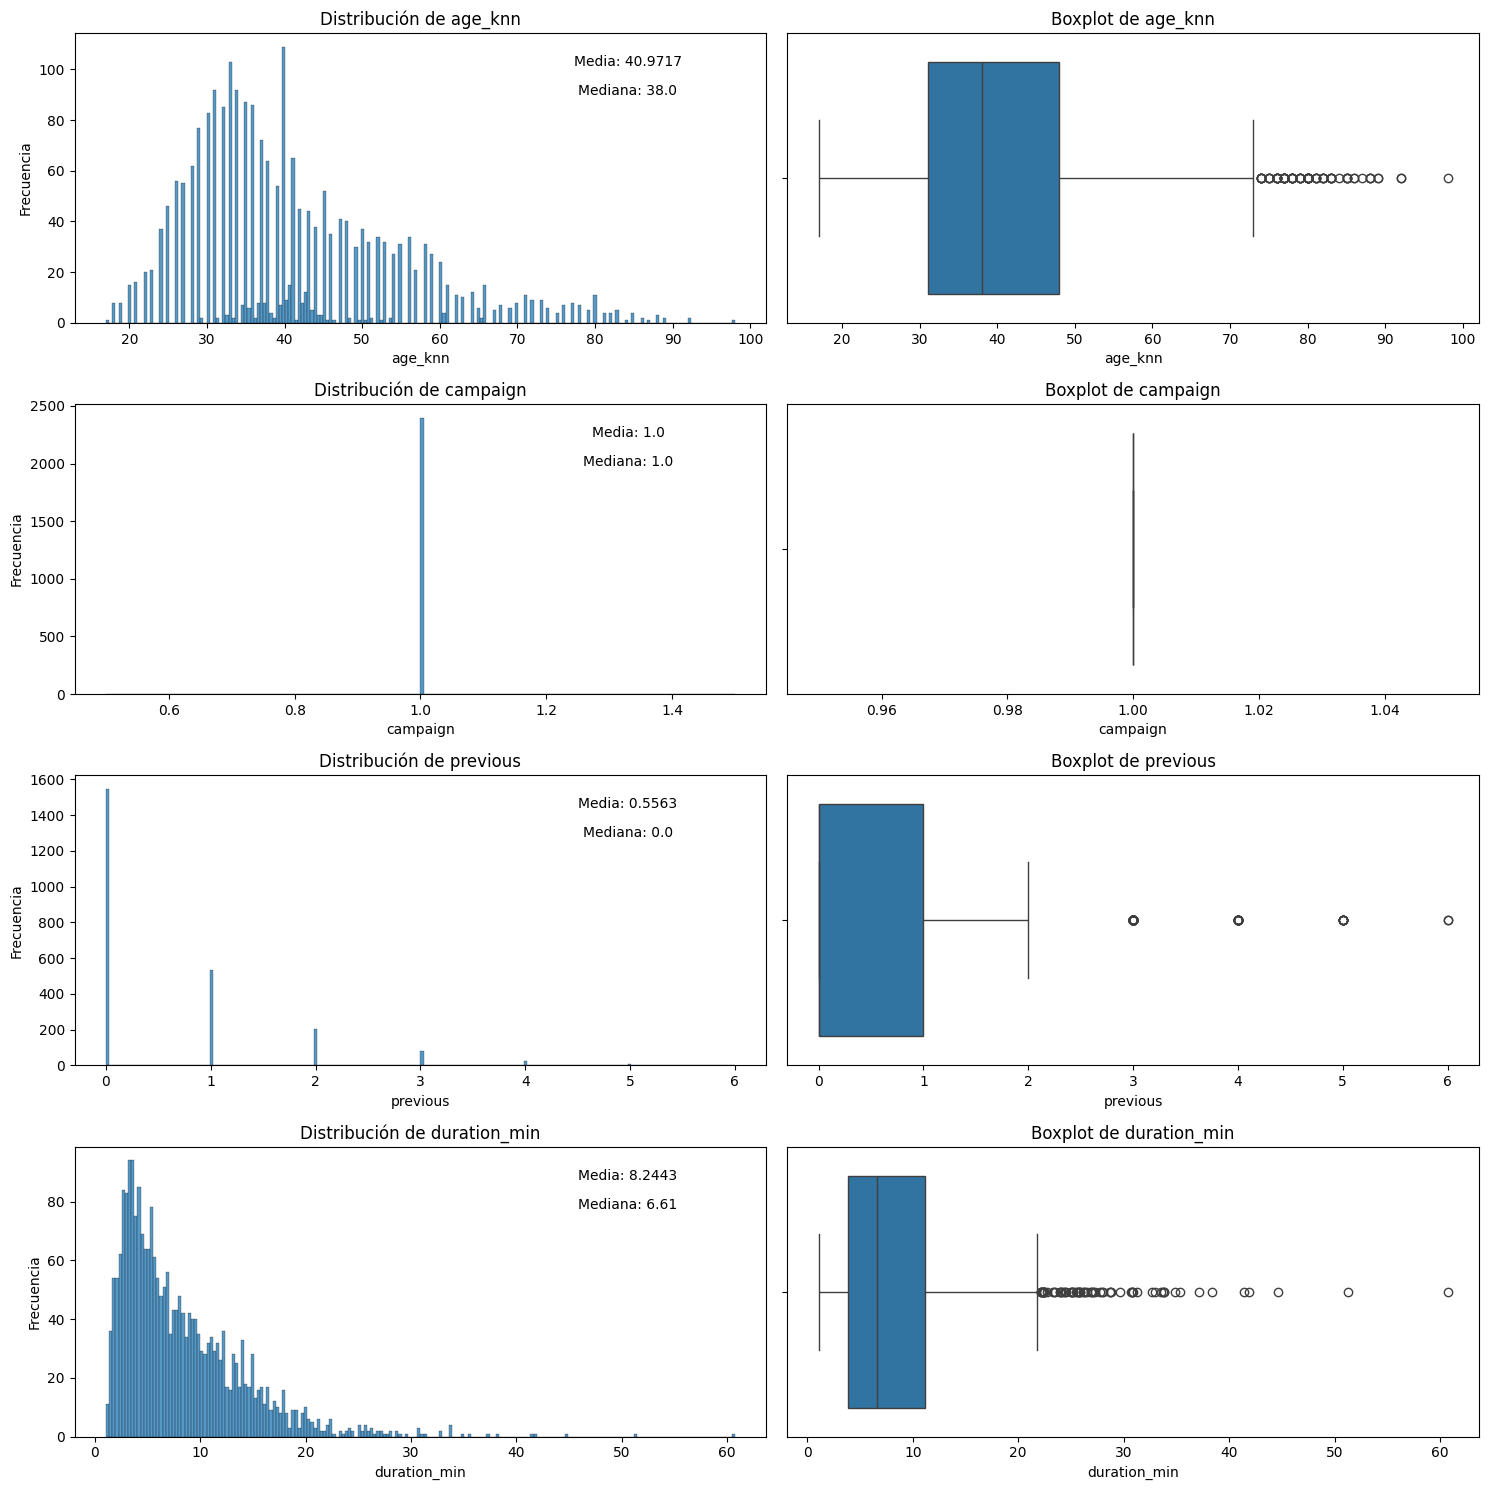

In [8]:
df_first = df[df['FCR'] == 1]
vis.subplot_col_num(df_first, col_num)

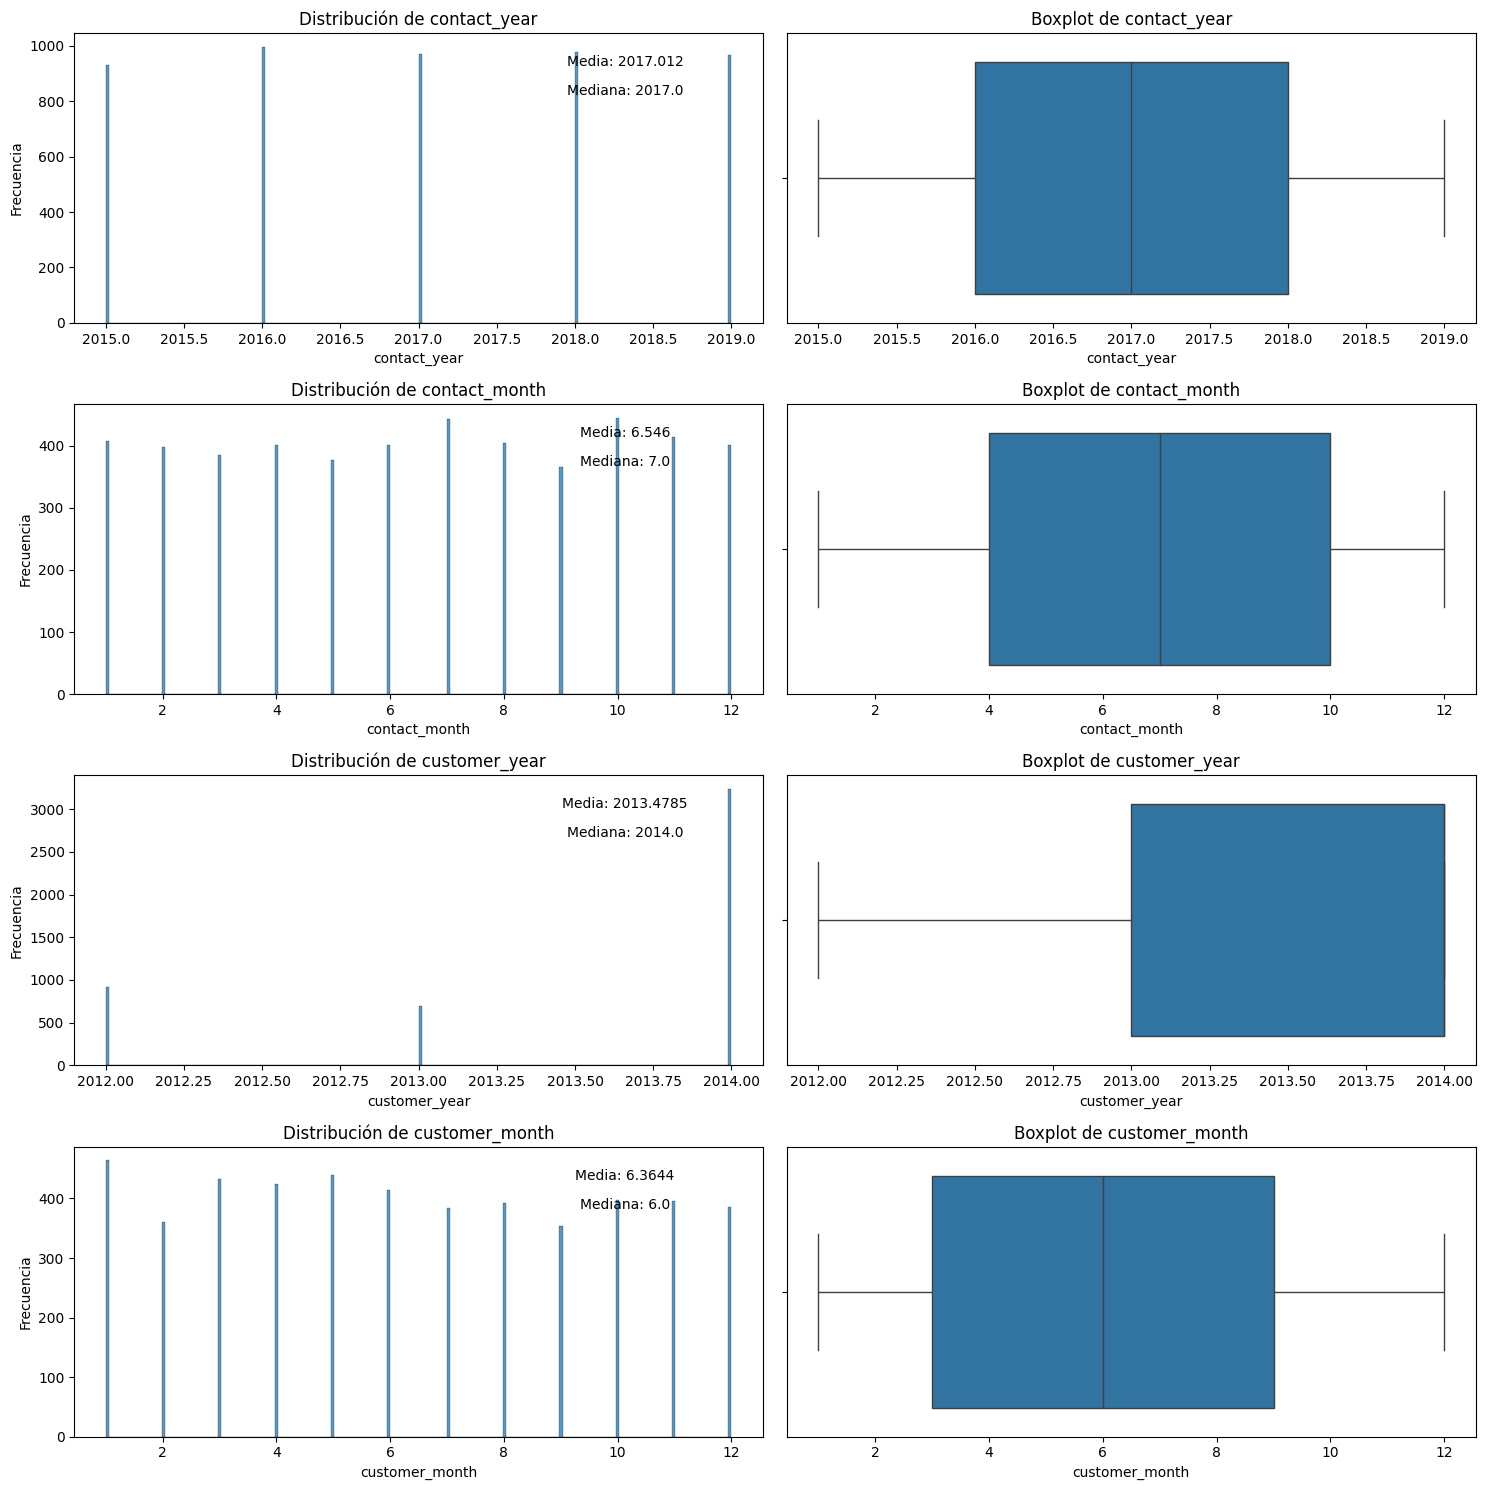

In [9]:
col_date = ['contact_year', 'contact_month', 'customer_year','customer_month']
vis.subplot_col_num(df_yes, col_date)

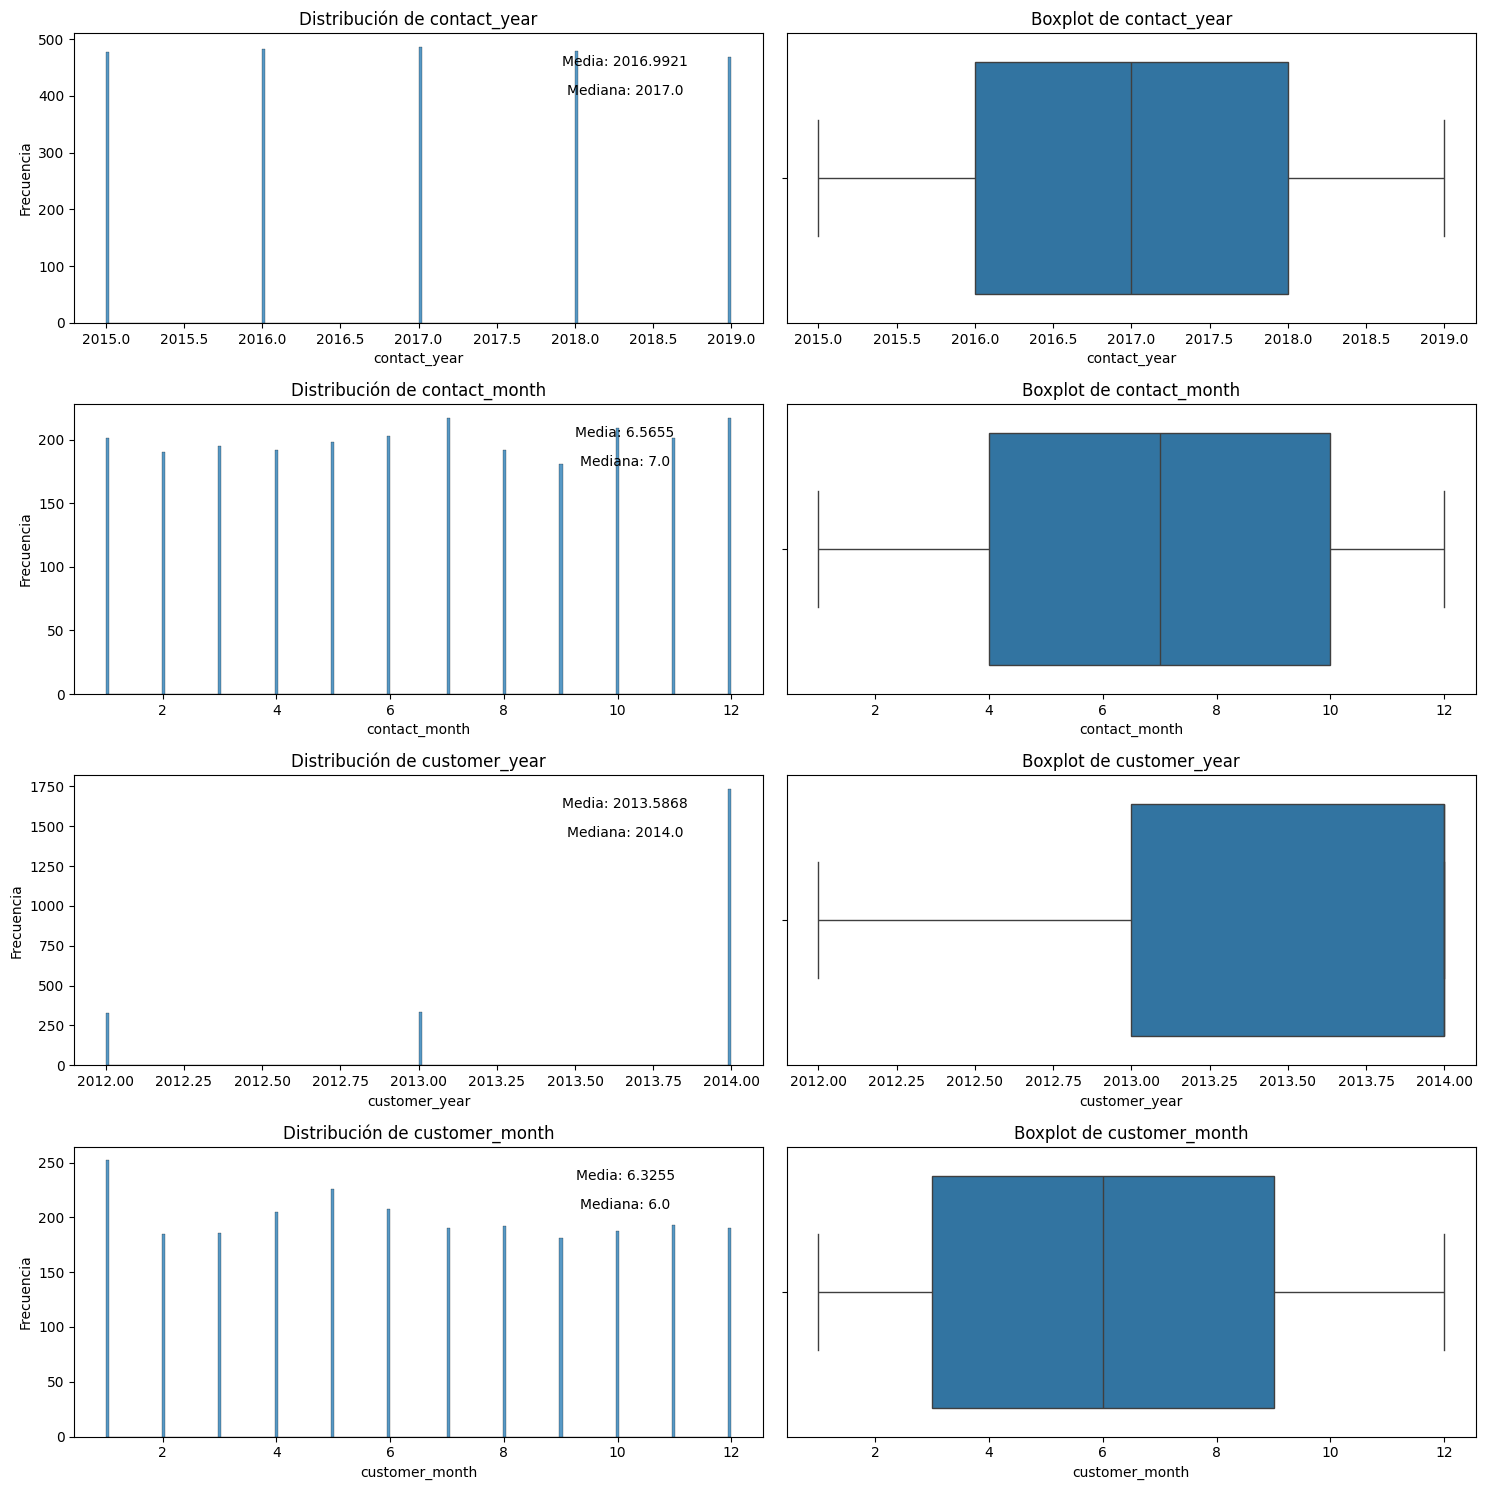

In [10]:
vis.subplot_col_num(df_first, col_date)

In [11]:
#Guardamos avances
df.to_csv("../data/data-metricas.csv", index=False)